In [16]:
import numpy as np
import matplotlib.pyplot as plt

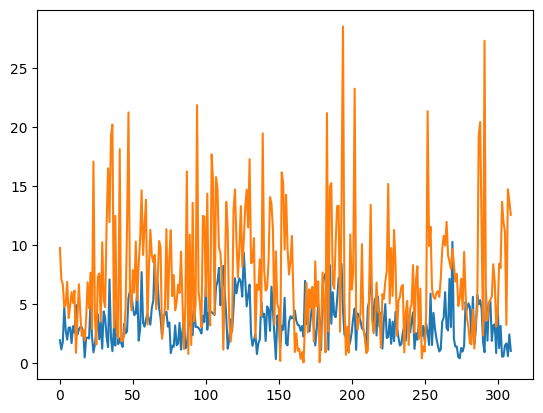

In [17]:
error = np.load('error.npy')
error[:,1] = np.where(abs(error[:,1])<abs(180-error[:,1]),error[:,1],180-error[:,1])
error[:,1] = np.where(abs(error[:,1])<abs(90-error[:,1]),error[:,1],90-error[:,1])
# 绘图
mask = np.where(error[:,0]>40)
error[mask] = 0
plt.plot(np.arange(error.shape[0]),error[:,0:2])
plt.show()

In [18]:
error_z = (error[:,0])
error_ori = (error[:,1])
np.sum(error_z)/(error.shape[0]-len(mask[0]))

3.4874329389255836

In [19]:
np.sum(error_ori)/(error.shape[0]-len(mask[0]))

7.460769844253354

In [21]:
np.where(error[:,1]>25)

(array([194, 291]),)

In [25]:
from autolab_core import Logger, RigidTransform
import numpy as np

pose = [24.2231,3.52393,41.3166,0.807133,0.194181,-0.40134,-0.386983]

T_qua2rota = RigidTransform(
    rotation=np.array([pose[3], pose[4], pose[5], pose[6]]),
    translation=np.array([pose[0], pose[1], pose[2]]),
    from_frame="marker_5",
    to_frame="world",
)
T4 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(0),
    translation=np.array([0.0,0.0,13.1]),
    from_frame="shuangji2_4",
    to_frame="shuangji_3",
)
T5 = RigidTransform(
    rotation=RigidTransform.z_axis_rotation(np.pi/2),
    translation=np.array([0.0,0.0,0.0]),
    from_frame="shuangji2_5",
    to_frame="shuangji2_4",
)
T6 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(np.pi),
    translation=np.array([0.0,0.0,0.0]),
    from_frame="shuangji2_6",
    to_frame="shuangji2_5",
)

T2_4 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(0),
    translation=np.array([1.2, 0, 13.11-6.10]),
    from_frame="shuangji3_4",
    to_frame="shuangji_3",
)            
T2_5 = RigidTransform(
    rotation=RigidTransform.y_axis_rotation(0),
    translation=np.array([0.0,0.0,0.0]),
    from_frame="shuangji3_5",
    to_frame="shuangji3_4",
)            
T2_6 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(0),
    translation=np.array([0.79-1.2, 0, 6.10]),
    from_frame="shuangji3_6",
    to_frame="shuangji3_5",
)
T2_7 = RigidTransform(
    rotation=RigidTransform.z_axis_rotation(np.pi/2),
    translation=np.array([0.0,0.0,0.0]),
    from_frame="shuangji3_7",
    to_frame="shuangji3_6",
)            
T2_8 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(-np.pi/2),
    translation=np.array([0,0,0]),
    from_frame="shuangji3_8",
    to_frame="shuangji3_7",
)


Tm_4 = RigidTransform(
    rotation=RigidTransform.z_axis_rotation((45)*np.pi/180),
    translation=np.array([0.0,0.0,0.0]),
    from_frame="marker_4",
    to_frame="shuangji_3",
)
Tm_5 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(0),
    translation=np.array([0, 0, -4.5]),  #-(- 4.237 + 6.3 + 1.3)
    from_frame="marker_5",
    to_frame="marker_4",
)

pose = T_qua2rota*(Tm_4*Tm_5).inverse()*(T4*T5*T6)
pose2 = T_qua2rota*(Tm_4*Tm_5).inverse()*(T2_4*T2_5*T2_6*T2_7*T2_8)

In [26]:
pose.translation

array([10.17549553,  3.4740116 , 51.91953907])

In [27]:
pose.quaternion

array([-0.02581369,  0.89378583, -0.04864926,  0.44509976])